# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('yulu_rental.csv', index_col=0)
df.head()

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

df.index = pd.to_datetime(df.index)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

Saving yulu_rental.csv to yulu_rental.csv



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

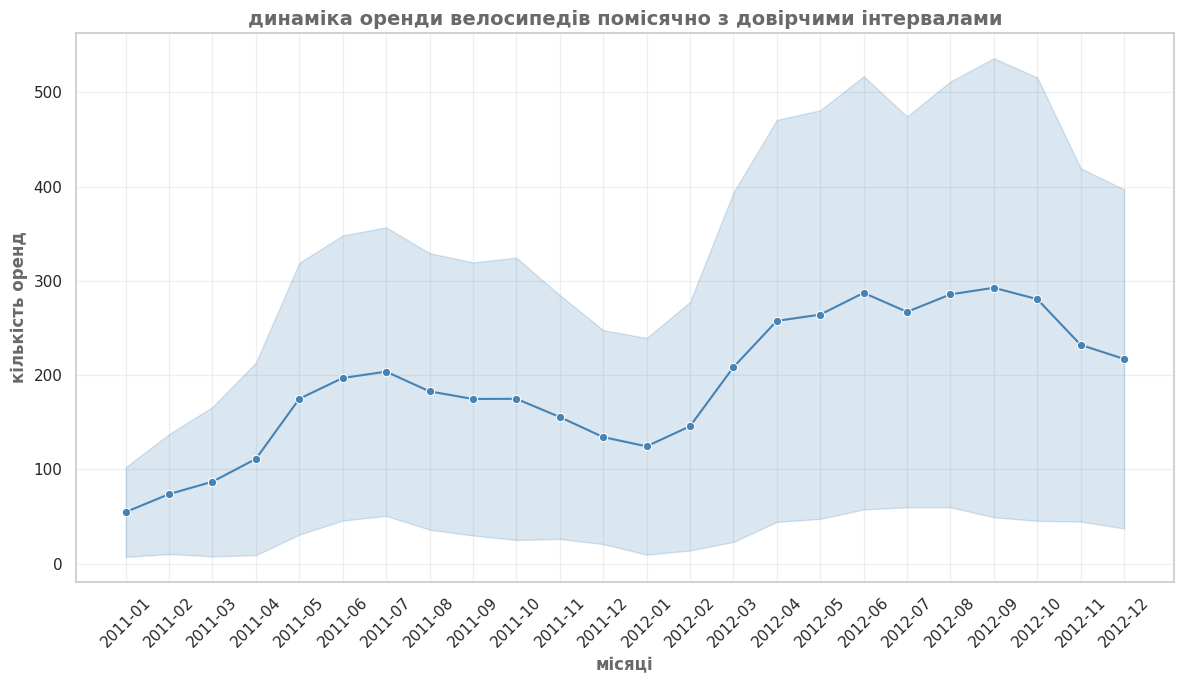

In [3]:
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=df,
    x='month_year',
    y='count',
    estimator='mean',
    errorbar='sd',
    marker='o',
    color='steelblue')
plt.title('динаміка оренди велосипедів помісячно з довірчими інтервалами', fontweight='bold', color='dimgray', fontsize=14)
plt.xlabel('місяці', color='dimgray', fontweight='bold')
plt.ylabel('кількість оренд', color='dimgray', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# найбільшою є невизначеність (тобто показники варіативності є найвищими) в
# місяці теплої пори року - на графіку піку вони досягають у вересні та червні 2012 року.




## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

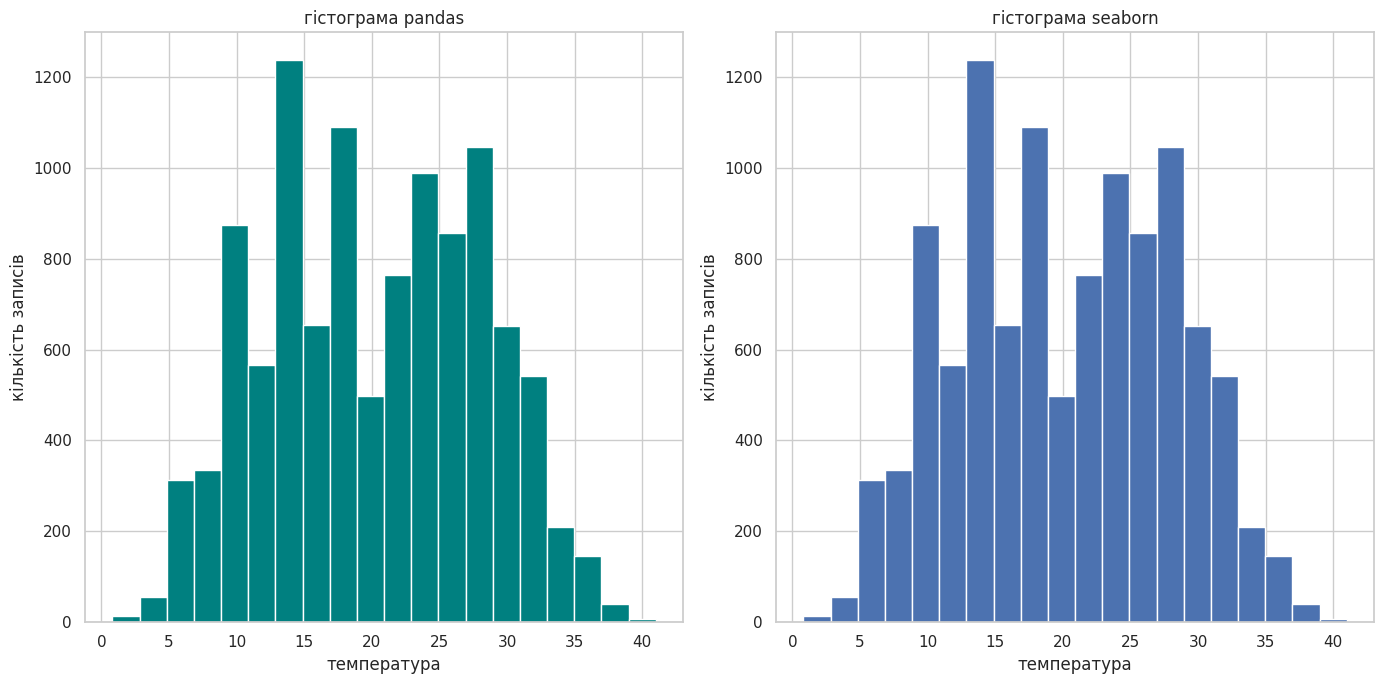

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

df['temp'].plot(kind='hist', ax=ax[0], bins=20, color='teal')
ax[0].set_title('гістограма pandas')
ax[0].set_xlabel('температура')
ax[0].set_ylabel('кількість записів')

sns.histplot(df['temp'], ax=ax[1], bins=20, alpha=1)
ax[1].set_title('гістограма seaborn')
ax[1].set_xlabel('температура')
ax[1].set_ylabel('кількість записів')

plt.tight_layout()
plt.show()

In [ ]:
# на мій погляд, графіки абсолютно ідентичні і нічим не відрізняються.
# ніякої додаткової лінії, на жаль, не бачу.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [5]:
weather_labels = {
    1: 'ясно',
    2: 'туман',
    3: 'легкий дощ',
    4: 'сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_labels)

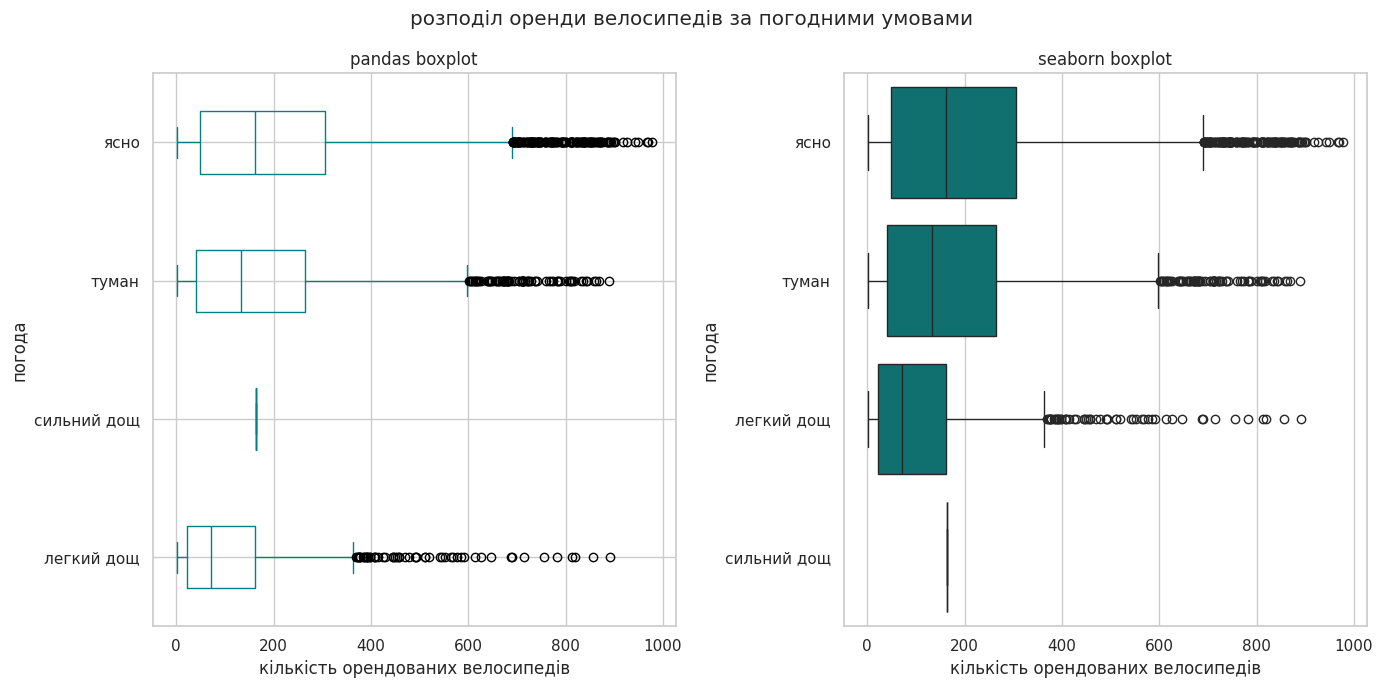

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

df.plot(
    kind='box',
    ax=ax[0],
    column='count',
    by='weather_name',
    vert=False,
    grid=True,
    color='teal',
    title='розподіл оренди велосипедів за погодними умовами',
    )

ax[0].set_title('pandas boxplot')
ax[0].set_xlabel('кількість орендованих велосипедів')
ax[0].set_ylabel('погода')

sns.boxplot(
    ax=ax[1],
    x='count',
    y='weather_name',
    data=df,
    color='teal')

ax[1].set_title('seaborn boxplot')
ax[1].set_xlabel('кількість орендованих велосипедів')
ax[1].set_ylabel('погода')

plt.tight_layout()
plt.show()

In [ ]:
# в seaborn ящик за замовчуванням має заливку і більш витягнутий в ширину.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [7]:
numeric_df = df.select_dtypes(include=np.number)

In [8]:
numeric_df1 = numeric_df.drop(['month', 'year', 'hour', 'weekday_num', 'week', 'day'], axis=1)

In [9]:
numeric_df1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [10]:
cor = numeric_df1.corr()

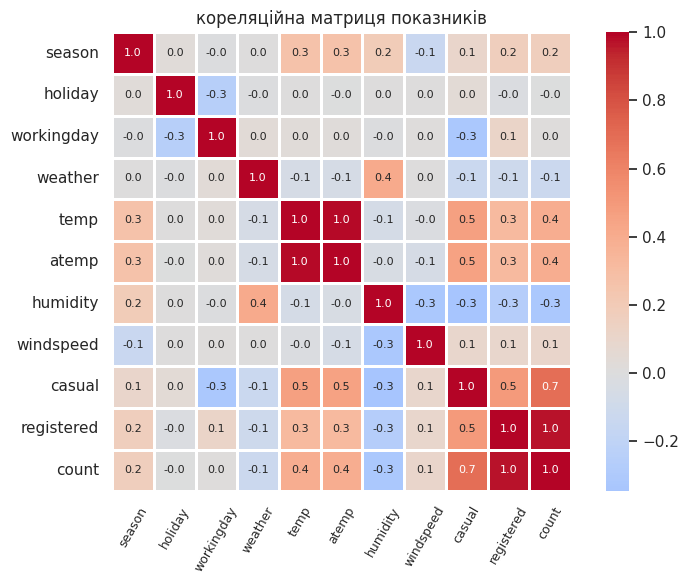

In [13]:
plt.figure(figsize=(8, 6))

sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".1f",
            annot_kws={"size": 8}, center=0, square=True, linewidths=1
            )
plt.xticks(fontsize=9, rotation=60)

plt.title('кореляційна матриця показників')
plt.tight_layout()
plt.show()

In [ ]:
# зі змінною count найбільше позитивно корелює змінна registered, це може
# свідчити про те, що сервісом користуються переважно зареєстровані
# користувачі, і коли загальна кількість оренд збільшується -
# це збільшення йде в першу чергу завдяки зареєстрованим користувачам
# (це підтверджується тим що з casual кореляція менша, лише 0.7)
# також є певна кореляція з температурою повітря, що цілком логічно.
# щодо негативної кореляції - бачимо що вона є з показниками вологості,
# що також логічно.

# між температурою та відчуттям температури 100% позитивна кореляція,
# що може означати що в даному регіоні фактично немає розриву між реальними
# показниками та суб"єктивним відчуттям погодних умов.

# негативну кореляцію мають показники швидкості вітру та вологості (що
# означає, що у дні з вологою погодою вітер менший і навпаки)
# також негативну кореляцію мають показники вологості і кількості оренд (і
# зареєстрованих, і випадкових користувачів)

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


Text(0.5, 1.0, 'динаміка оренди велосипедів за кварталами')

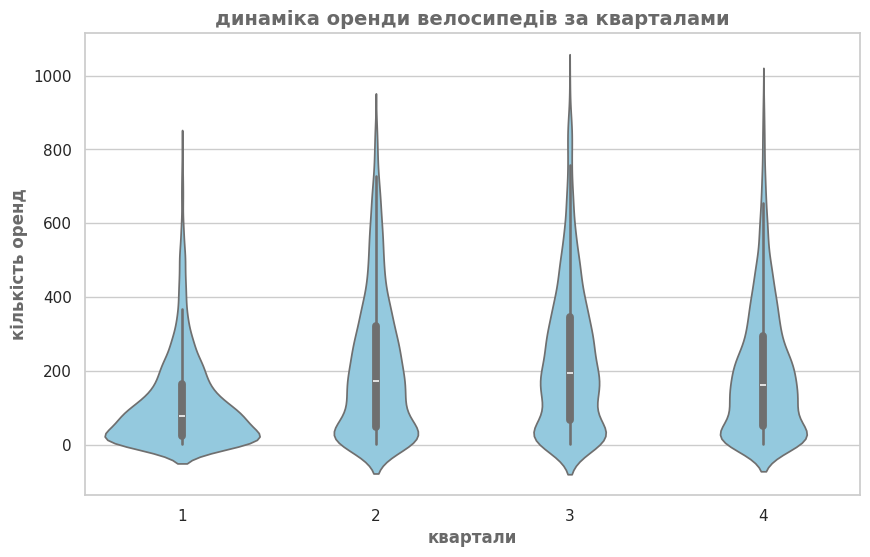

In [33]:
plt.figure(figsize=(10, 6))

ax = sns.violinplot(data=df, x='season', y='count', color='skyblue')
ax.set_xlabel('квартали', fontweight='bold', fontsize=12, color='dimgray')
ax.set_ylabel('кількість оренд', fontweight='bold', fontsize=12, color='dimgray')
ax.set_title('динаміка оренди велосипедів за кварталами', fontweight='bold', fontsize=14, color='dimgray')

In [34]:
# товщина показує густину розподілу даних. що "товстіші" ділянки - то більше в них значень

# найбільша варіабельність показників оренди у третьому кварталі, що цілком логічно -
# це літо, отже оренд загалом найбільше (сезонний ріст показників), бачимо що і розкид
# найбільший (скрипка найдовша)

# переваги violin plot над box plot у тому, що перший буквально показує форму
# розподілу даних, тобто конкретно місця, де значень більше або менше,
# можна побачити наскільки симетричним є розподіл, чого не покаже коробковий графік.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

In [52]:
sample_df = df[['temp', 'humidity', 'windspeed', 'count', 'season']].sample(100)

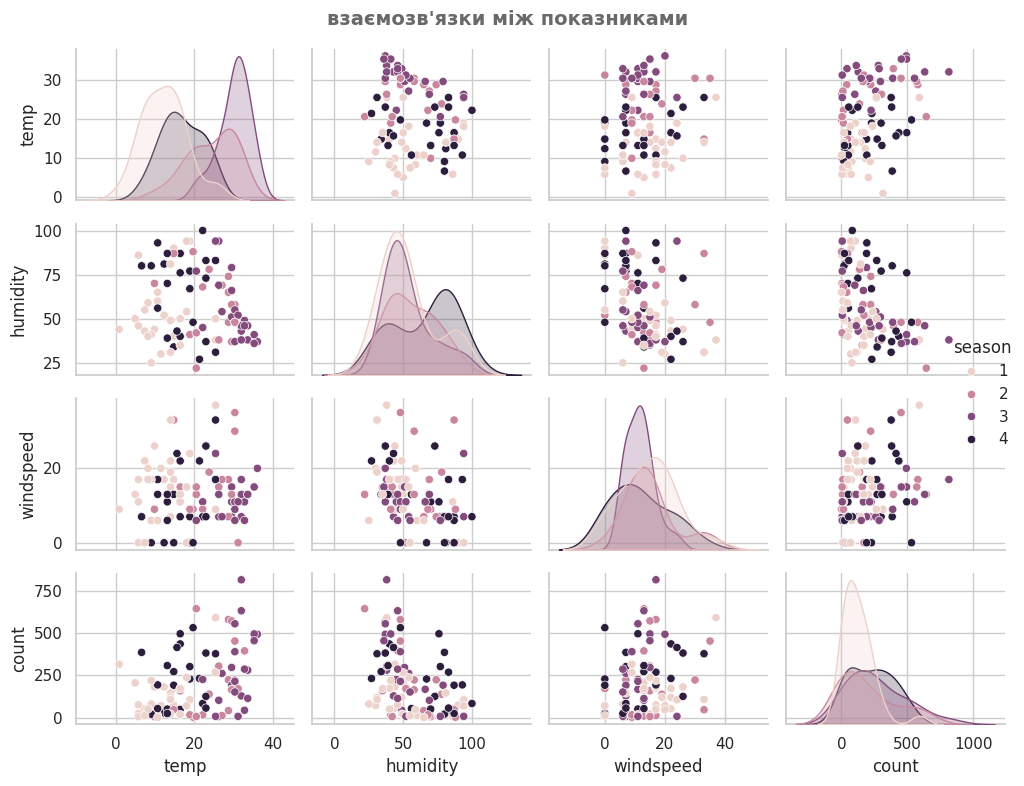

In [56]:
sns.pairplot(sample_df, height=2.0, aspect=1.2, vars=['temp', 'humidity', 'windspeed', 'count'], hue='season')
plt.suptitle('взаємозв\'язки між показниками', fontweight='bold', fontsize=14, color='dimgray')
plt.tight_layout()
plt.show()

In [ ]:
# найбільш помітний лінійний зв'язок бачимо між кількістю оренд та температурою,
# можемо це бачити на нижньому графіку ліворуч.

# найбільше за кварталами відрізняється показник кількості оренд.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

In [59]:
sample = df[['temp', 'count', 'workingday']].sample(100)

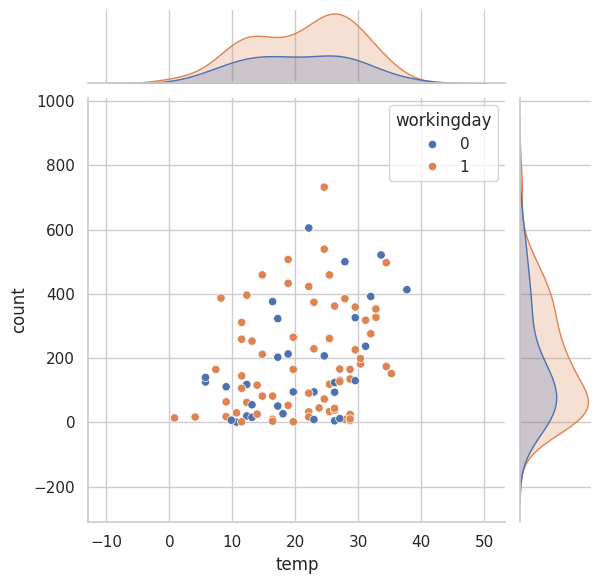

In [60]:
sns.jointplot(data=sample, x='temp', y='count', hue='workingday')

In [61]:
# верхній графік показує розподіл значень температури
# графік праворуч показує розподіл кількості оренд

# так, різниця є. кількість оренд більша у вихідні дні.